# Employee Salary Prediction
This notebook uses a simulated dataset inspired by Kaggle's salary prediction data to train and evaluate machine learning models for salary estimation.

In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score


In [4]:

df = pd.read_csv("salary_prediction_data.csv")
df.head()


,Company,Job Title,Degree,Years of Experience,Location,Salary
0,Google,Software Engineer,Bachelors,1,New York,120000
1,Facebook,Data Scientist,Masters,2,San Francisco,135000
2,Amazon,Product Manager,PhD,3,Seattle,150000
3,Apple,DevOps Engineer,Bachelors,4,Austin,115000
4,Netflix,Analyst,Masters,5,Boston,125000


In [5]:

df_encoded = pd.get_dummies(df, columns=['Company', 'Job Title', 'Degree', 'Location'], drop_first=True)
X = df_encoded.drop('Salary', axis=1)
y = df_encoded['Salary']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [6]:

lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
lr_pred = lr_model.predict(X_test)

lr_mse = mean_squared_error(y_test, lr_pred)
lr_r2 = r2_score(y_test, lr_pred)
print(f"Linear Regression MSE: {lr_mse:.2f}")
print(f"Linear Regression R² Score: {lr_r2:.4f}")


Linear Regression MSE: 10232105.79
Linear Regression R² Score: 0.9484


In [7]:

rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)

rf_mse = mean_squared_error(y_test, rf_pred)
rf_r2 = r2_score(y_test, rf_pred)
print(f"Random Forest MSE: {rf_mse:.2f}")
print(f"Random Forest R² Score: {rf_r2:.4f}")


Random Forest MSE: 10232069.26
Random Forest R² Score: 0.9484


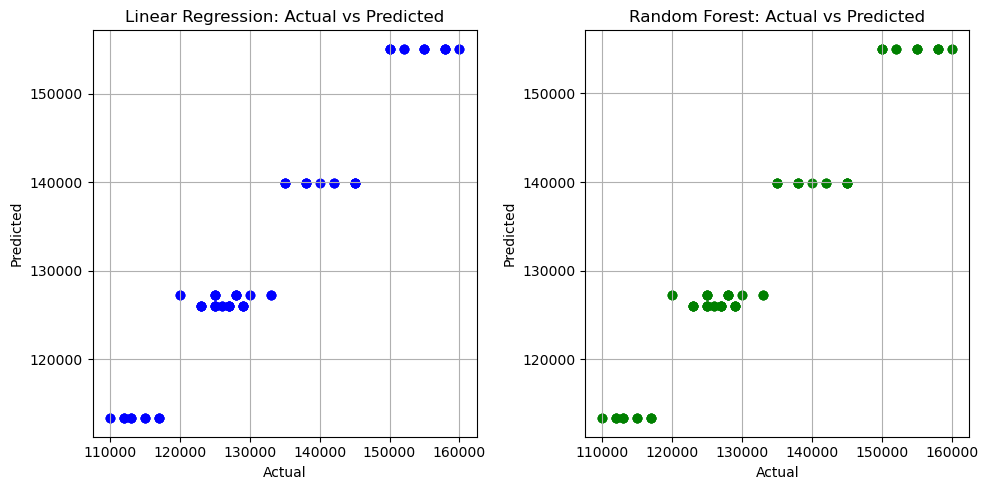

In [8]:

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.scatter(y_test, lr_pred, alpha=0.6, color='blue')
plt.title("Linear Regression: Actual vs Predicted")
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.grid(True)

plt.subplot(1, 2, 2)
plt.scatter(y_test, rf_pred, alpha=0.6, color='green')
plt.title("Random Forest: Actual vs Predicted")
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.grid(True)

plt.tight_layout()
plt.show()


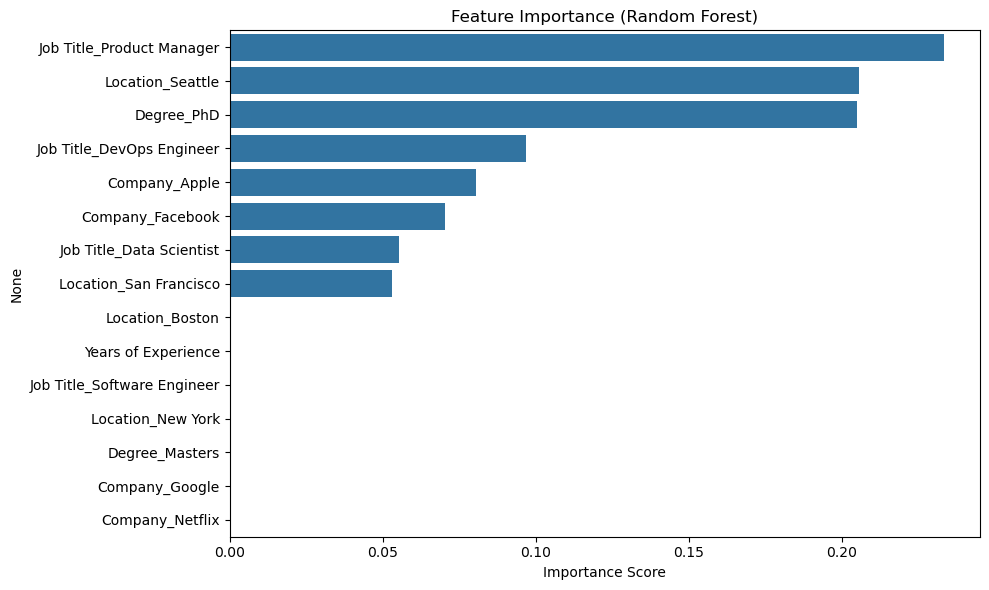

In [9]:

feature_importances = pd.Series(rf_model.feature_importances_, index=X.columns).sort_values(ascending=False)
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importances.values, y=feature_importances.index)
plt.title("Feature Importance (Random Forest)")
plt.xlabel("Importance Score")
plt.tight_layout()
plt.show()
